<a href="https://colab.research.google.com/github/Hassan93Fattahi/Machine-Learning-for-Loan-Status-Prediction/blob/main/Machine_Learning_for_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [ ]:
df = pd.read_csv("loan_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
df.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


In [ ]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

# Exploratory Data Analysis

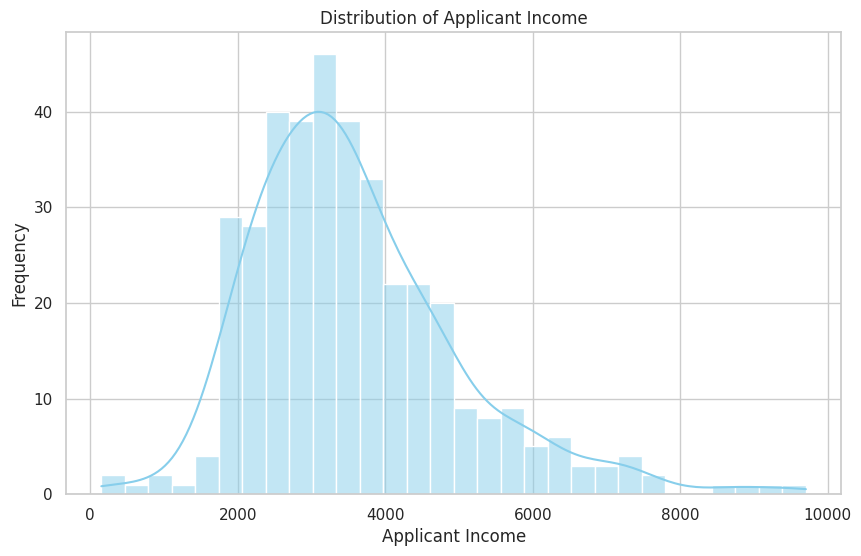

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the ApplicantIncome column
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='skyblue')

# labels and title
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.show()

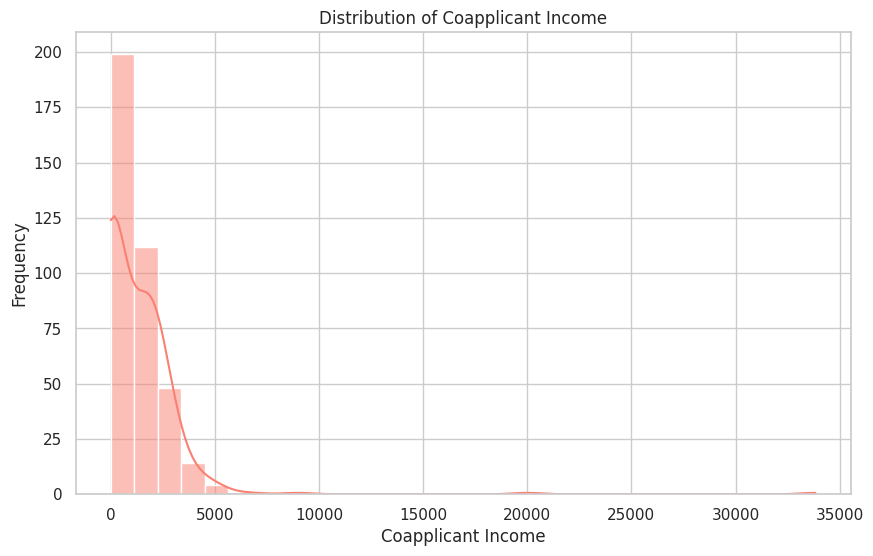

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting the CoapplicantIncome column
sns.histplot(df['CoapplicantIncome'], bins=30, kde=True, color='salmon')

#labels and title
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()


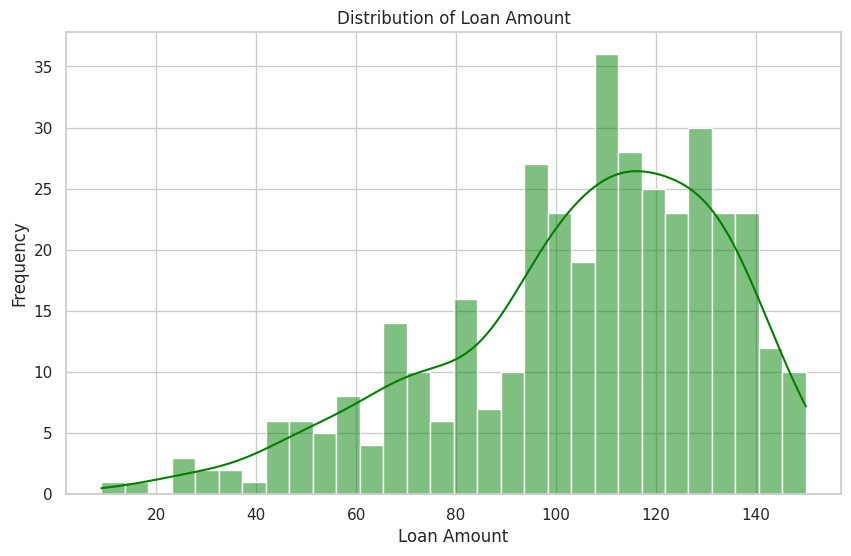

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting the LoanAmount column
sns.histplot(df['LoanAmount'].dropna(), bins=30, kde=True, color='green')

plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.show()


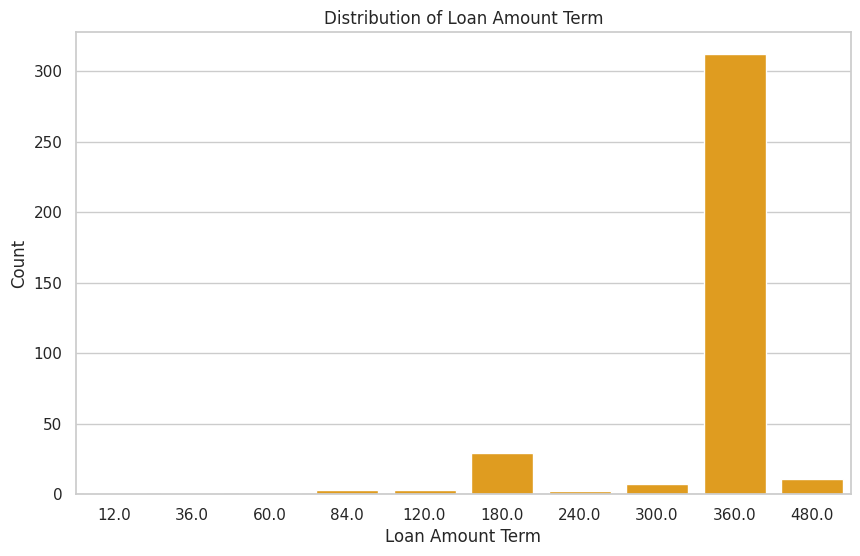

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Loan_Amount_Term', data=df, color='orange')

plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')

plt.show()


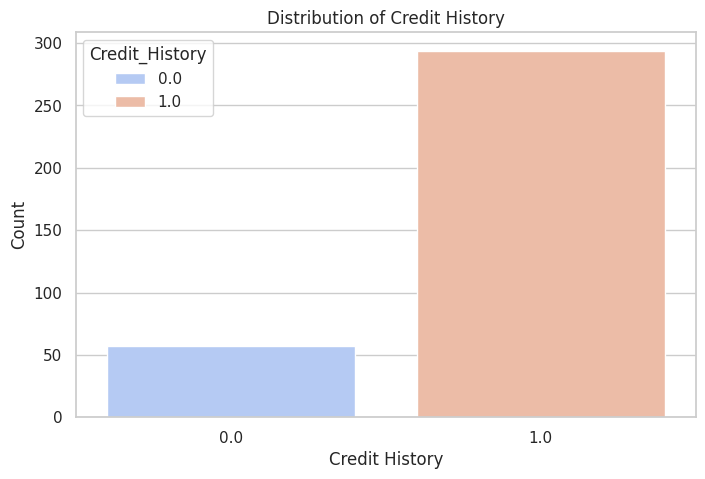

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', data=df, hue="Credit_History" , palette='coolwarm')
plt.title('Distribution of Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')

plt.show()


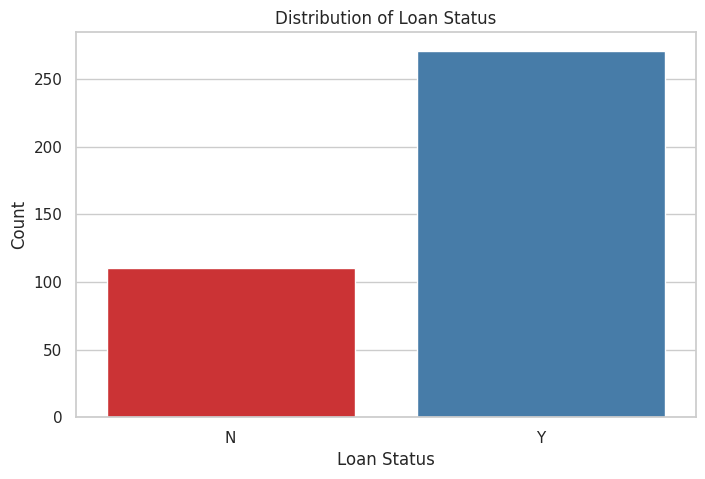

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=df, hue="Loan_Status", palette='Set1')

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.show()


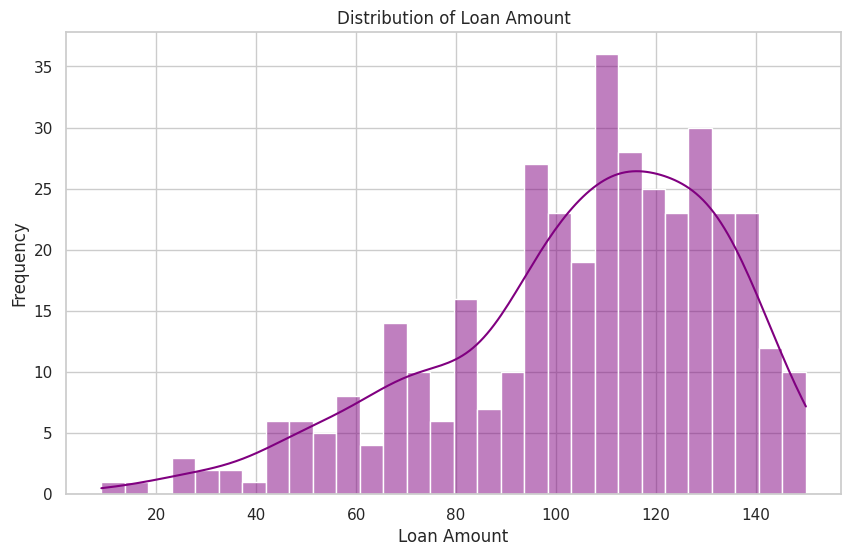

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['LoanAmount'].dropna(), bins=30, kde=True, color='purple')

plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.show()


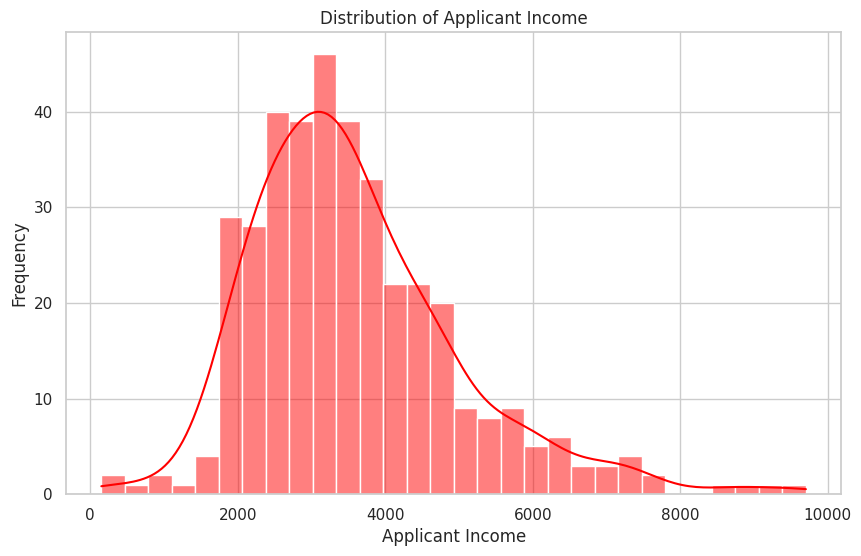

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='red')

plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.show()


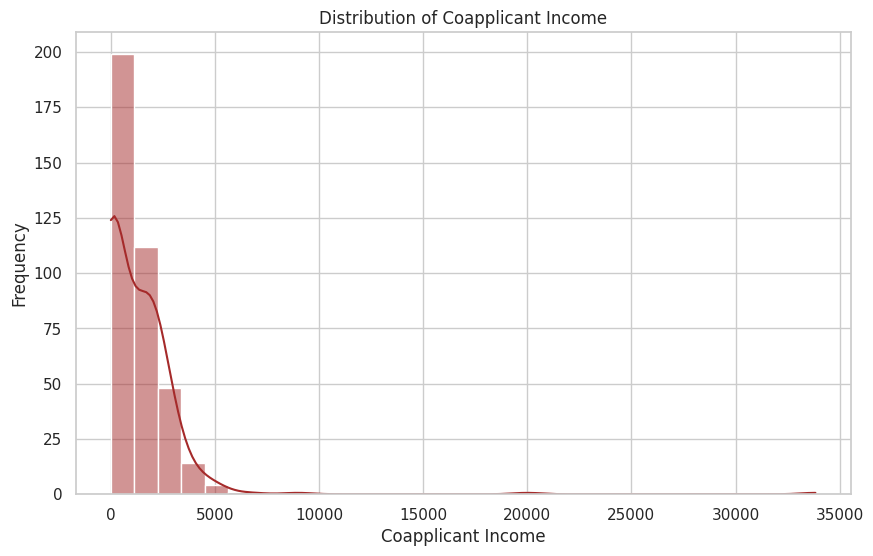

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['CoapplicantIncome'].dropna(), bins=30, kde=True, color='brown')

plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

plt.show()


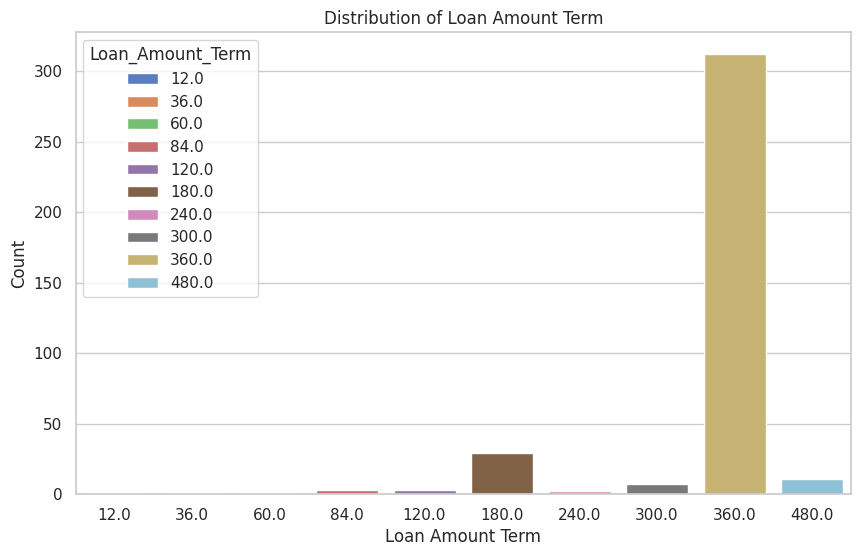

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Loan_Amount_Term', data=df, hue="Loan_Amount_Term" , palette='muted')

plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')

plt.show()


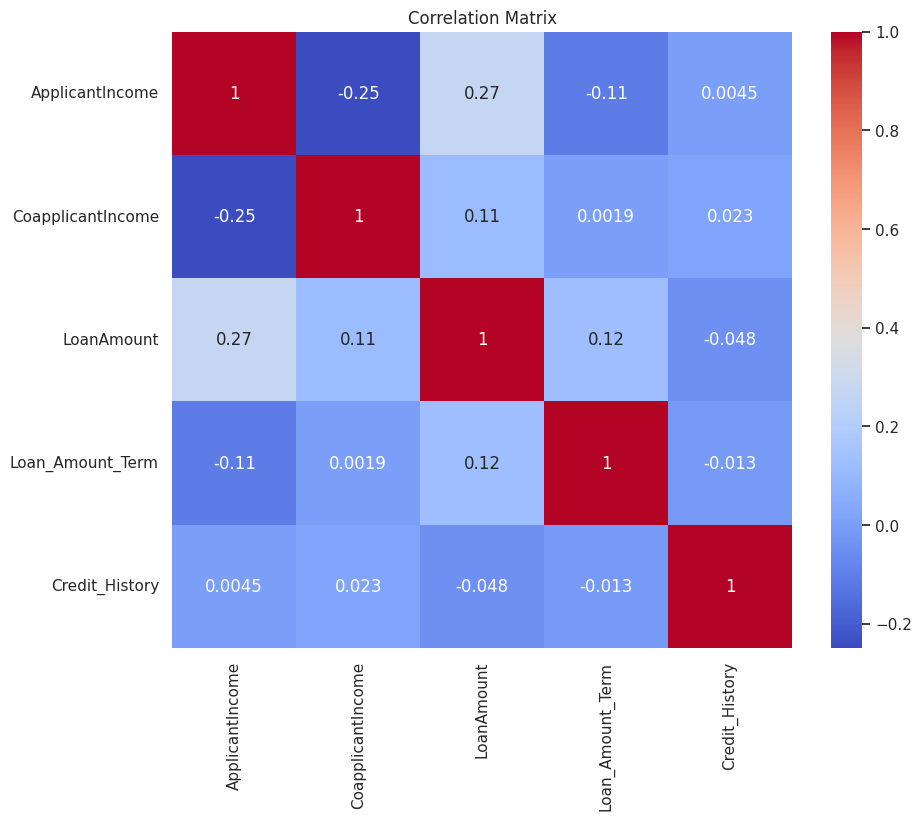

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing Data

In [ ]:
categorical_columns = ['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [ ]:
numeric_columns = ['CoapplicantIncome', 'LoanAmount']

for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df = df.drop(['Loan_ID'], axis=1)

In [ ]:
df_encoded = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df_encoded.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB


In [ ]:
df_scaled = df_encoded.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Select columns to scale (excluding Loan_Status which is the target variable)
columns_to_scale = df_scaled.columns.difference(['Loan_Status'])

# Apply standard scaling to selected columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.535875,0.819178,0.337948,-0.608690,-0.318050,0.707469,0.098695,0.812575,0.275147,0.419435,-1.351832,0
1,0.535875,0.819178,-0.675895,-0.608690,3.144156,-0.408932,-0.546371,-1.376596,0.275147,0.419435,1.216986,1
2,0.535875,0.819178,-0.675895,1.642872,-0.318050,-0.703019,0.462294,0.530102,0.275147,0.419435,1.216986,1
3,0.535875,-1.220736,-0.675895,-0.608690,-0.318050,1.706799,-0.546371,1.271595,0.275147,0.419435,1.216986,1
4,0.535875,0.819178,-0.675895,1.642872,-0.318050,-0.879330,0.102118,-0.352629,0.275147,0.419435,1.216986,1


In [ ]:
X = df_scaled.drop(['Loan_Status'], axis=1)
y = df_scaled['Loan_Status']

In [ ]:
X.shape, y.shape

((381, 11), (381,))

In [ ]:
# Split the data into training and testing sets(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (304, 11)
X_test shape: (77, 11)
y_train shape: (304,)
y_test shape: (77,)


In [ ]:
# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gnb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)

# Display the results
print("Accuracy for Gaussian Naive Bayes:", accuracy_gnb)
print("\nConfusion Matrix:\n", conf_matrix_gnb)
print("\nClassification Report:\n", class_report_gnb)


Accuracy for Gaussian Naive Bayes: 0.8181818181818182

Confusion Matrix:
 [[ 7 14]
 [ 0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Display the results
print("Accuracy (KNN):", accuracy_knn)
print("\nConfusion Matrix (KNN):\n", conf_matrix_knn)
print("\nClassification Report (KNN):\n", class_report_knn)


Accuracy (KNN): 0.8051948051948052

Confusion Matrix (KNN):
 [[ 7 14]
 [ 1 55]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.80      0.98      0.88        56

    accuracy                           0.81        77
   macro avg       0.84      0.66      0.68        77
weighted avg       0.82      0.81      0.77        77



In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear',random_state =42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Display the results
print("Accuracy (SVM):", accuracy_svm)
print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)
print("\nClassification Report (SVM):\n", class_report_svm)


Accuracy (SVM): 0.8181818181818182

Confusion Matrix (SVM):
 [[ 7 14]
 [ 0 56]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



In [ ]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Display the results
print("Accuracy (Decision Tree):", accuracy_dt)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)
print("\nClassification Report (Decision Tree):\n", class_report_dt)


Accuracy (Decision Tree): 0.7272727272727273

Confusion Matrix (Decision Tree):
 [[ 8 13]
 [ 8 48]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        21
           1       0.79      0.86      0.82        56

    accuracy                           0.73        77
   macro avg       0.64      0.62      0.63        77
weighted avg       0.71      0.73      0.71        77



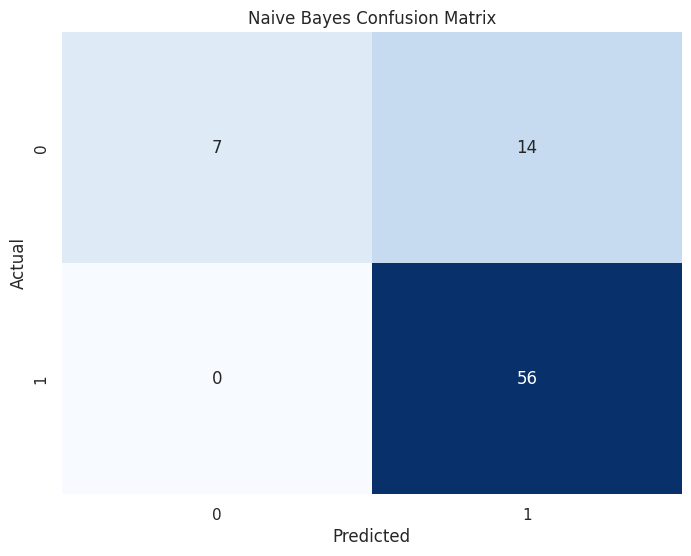

In [ ]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

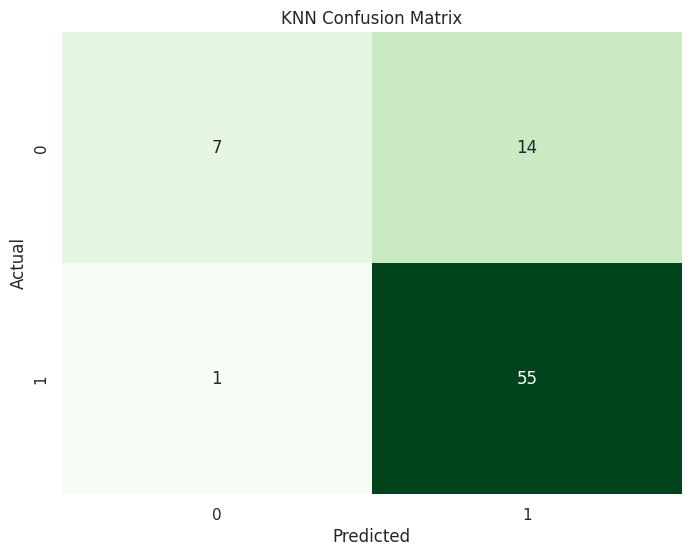

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

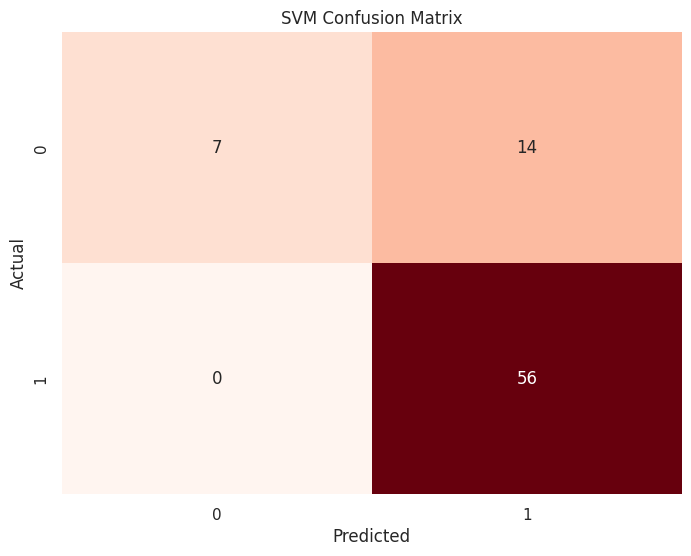

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

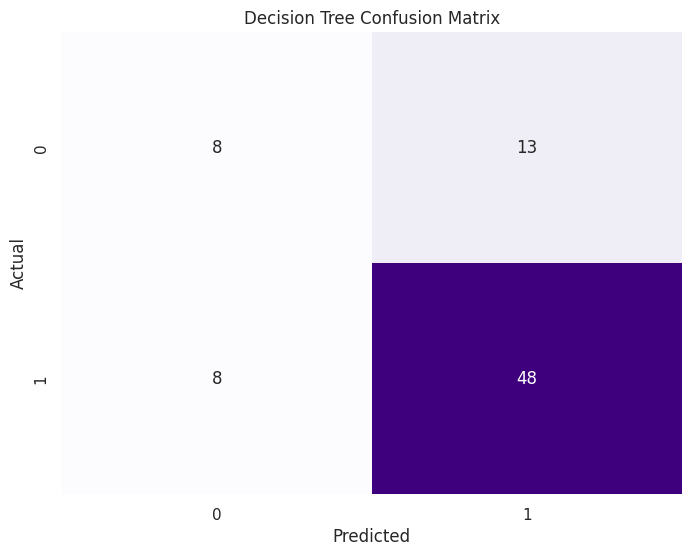

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

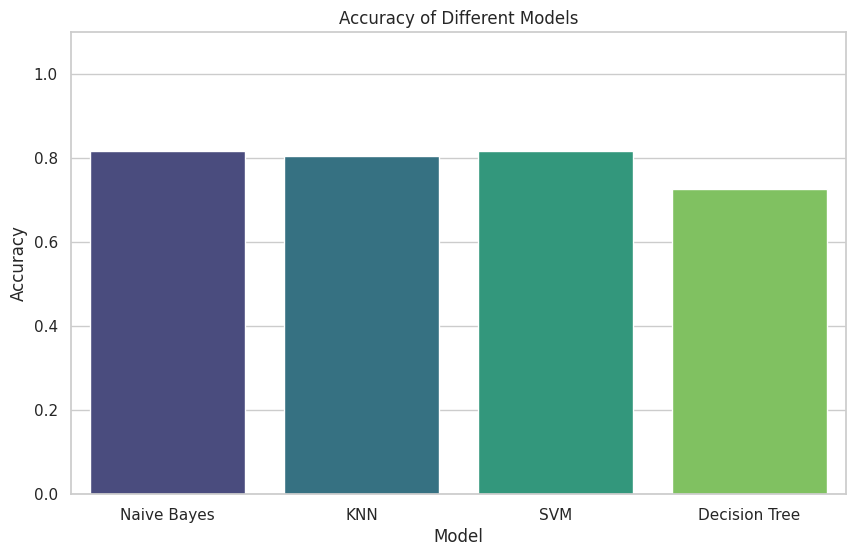

In [ ]:
# Accuracy values for each model
accuracy_values = [accuracy_gnb, accuracy_knn, accuracy_svm, accuracy_dt]

# Model names
model_names = ['Naive Bayes', 'KNN', 'SVM', 'Decision Tree']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values, hue=model_names, palette='viridis', dodge=False)
plt.ylim(0, 1.1)  # Set y-axis limit for accuracy
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


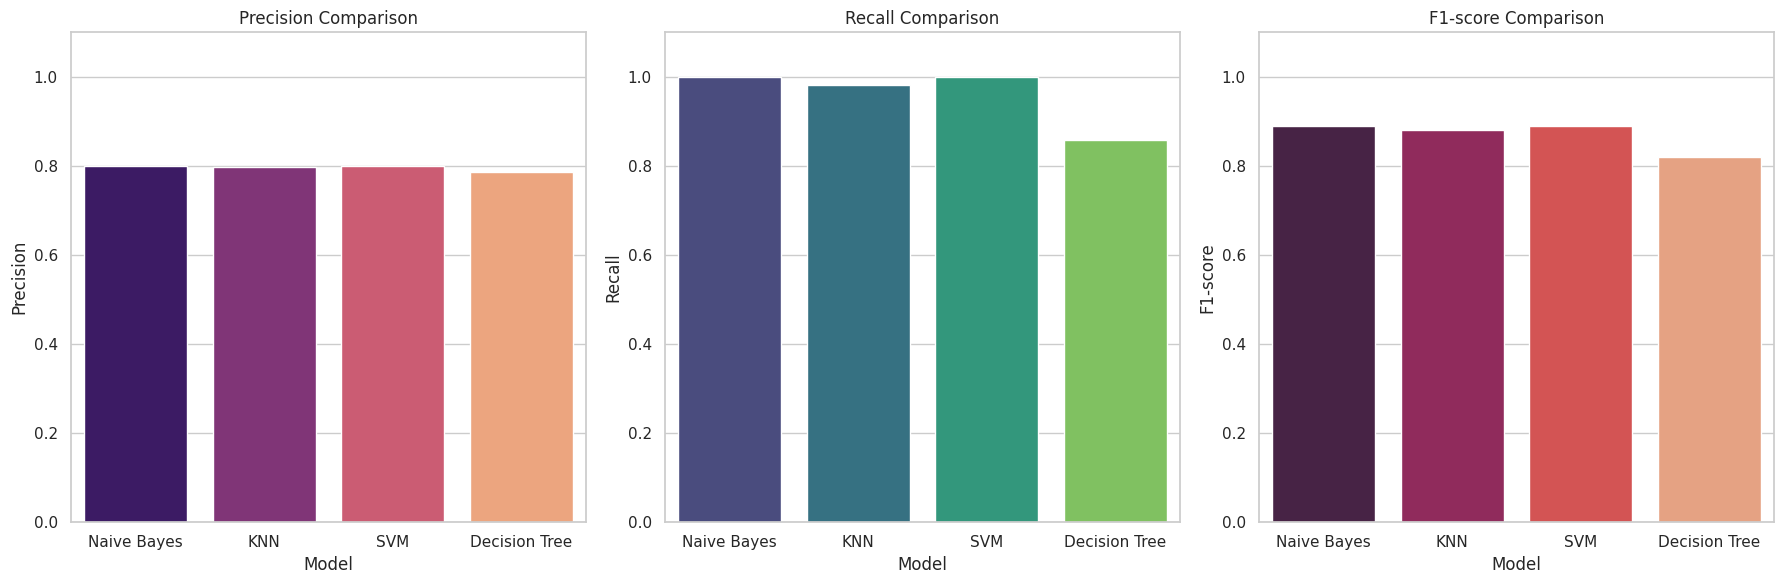

In [ ]:
# model names and their corresponding predictions
models = ['Naive Bayes', 'KNN', 'SVM', 'Decision Tree']
predictions = [y_pred_gnb, y_pred_knn, y_pred_svm, y_pred_dt]

# Initialize lists to store precision, recall, and F1-score for each model
precisions = []
recalls = []
f1_scores = []

# Compute precision, recall, and F1-score for each model
for pred in predictions:
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, pred, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Create subplots for precision, recall, and F1-score
plt.figure(figsize=(18, 6))

# Precision subplot
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=precisions, hue=models, palette='magma', dodge=False)
plt.ylim(0, 1.1)
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')

# Recall subplot
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=recalls, hue=models, palette='viridis', dodge=False)
plt.ylim(0, 1.1)
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')

# F1-score subplot
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=f1_scores, hue=models, palette='rocket', dodge=False)
plt.ylim(0, 1.1)
plt.title('F1-score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()



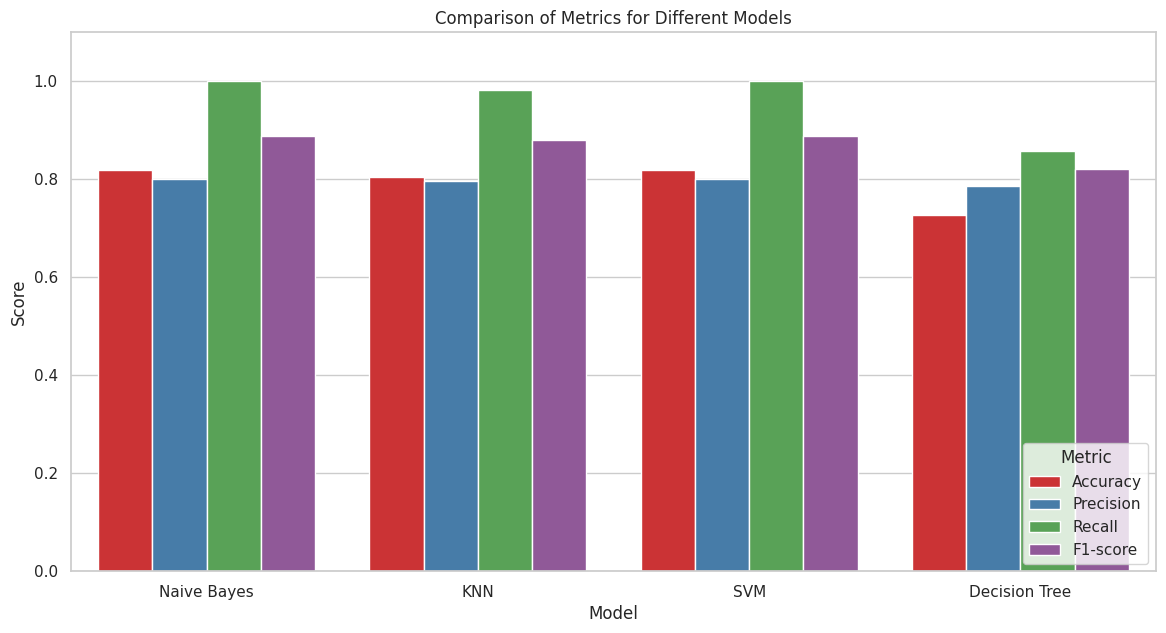

In [ ]:
# Create a DataFrame for accuracy, precision, recall, and F1-score for each model
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': [accuracy_gnb, accuracy_knn, accuracy_svm, accuracy_dt],
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Melt the DataFrame to have 'Metric' and 'Score' columns
melted_df = pd.melt(metrics_df, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot the metrics
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette='Set1')
plt.title('Comparison of Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.legend(title='Metric', loc='lower right')
plt.show()
